### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31960\2050007954.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')




### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['wn'] = wn

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31960\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.383712
std,292.559287,293.959649
min,438.920000,60.834041
25%,914.620000,887.120733
50%,1144.650000,1088.433569
75%,1316.280729,1285.800542
max,1570.252238,2198.337549


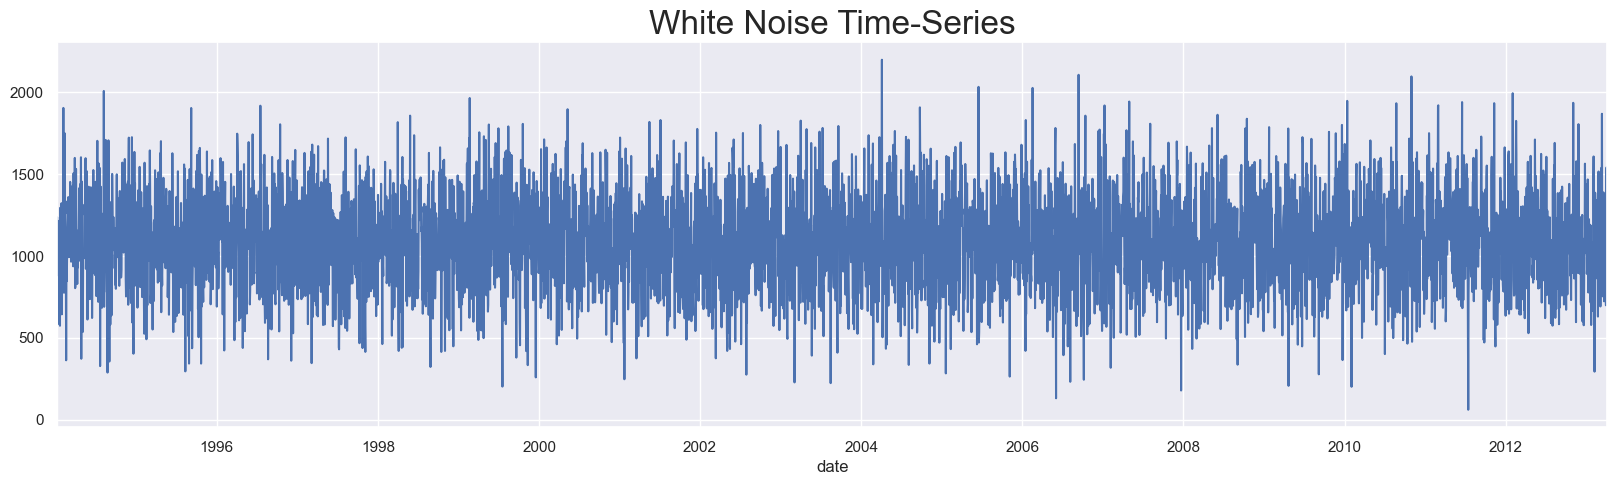

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

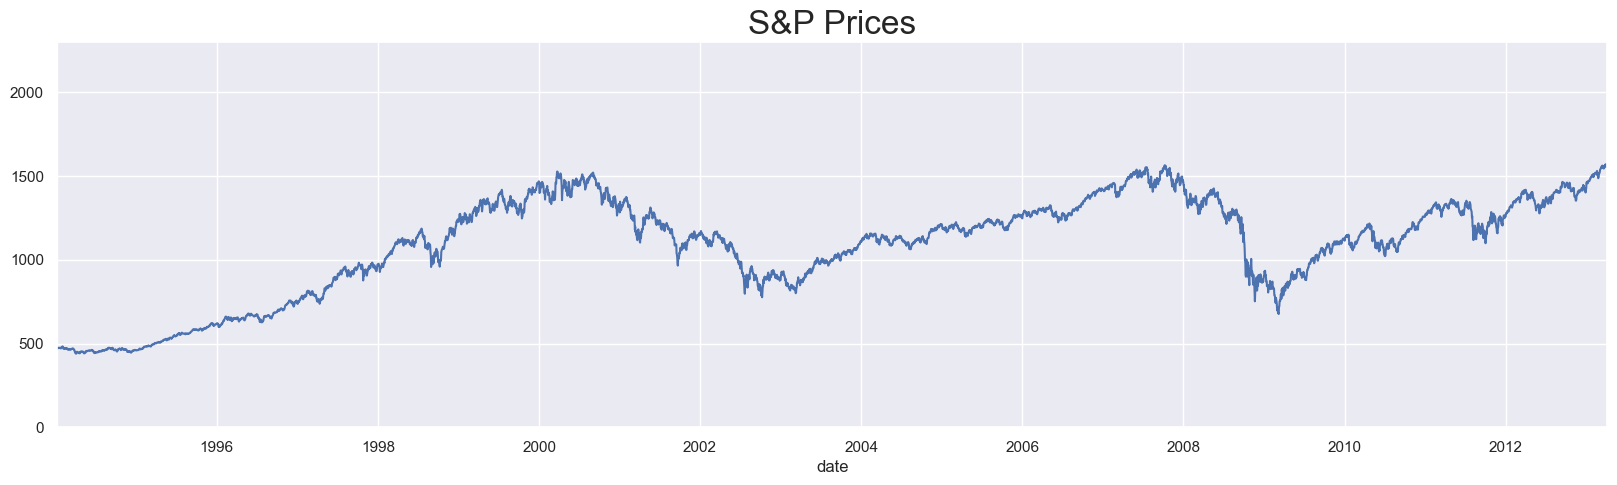

In [9]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [10]:
rw = pd.read_csv("RandWalk.csv")


In [11]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [12]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [13]:
rw.set_index("date", inplace = True)


In [14]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [15]:
rw = rw.asfreq('b')

In [16]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df['rw'] = rw.price

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31960\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [18]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1236.084824,1122.139662
1994-01-10,475.27,944.809120,1080.347860
1994-01-11,474.13,916.770179,1082.095245
1994-01-12,474.17,881.496131,1083.639265
1994-01-13,472.47,1210.431739,1067.146255


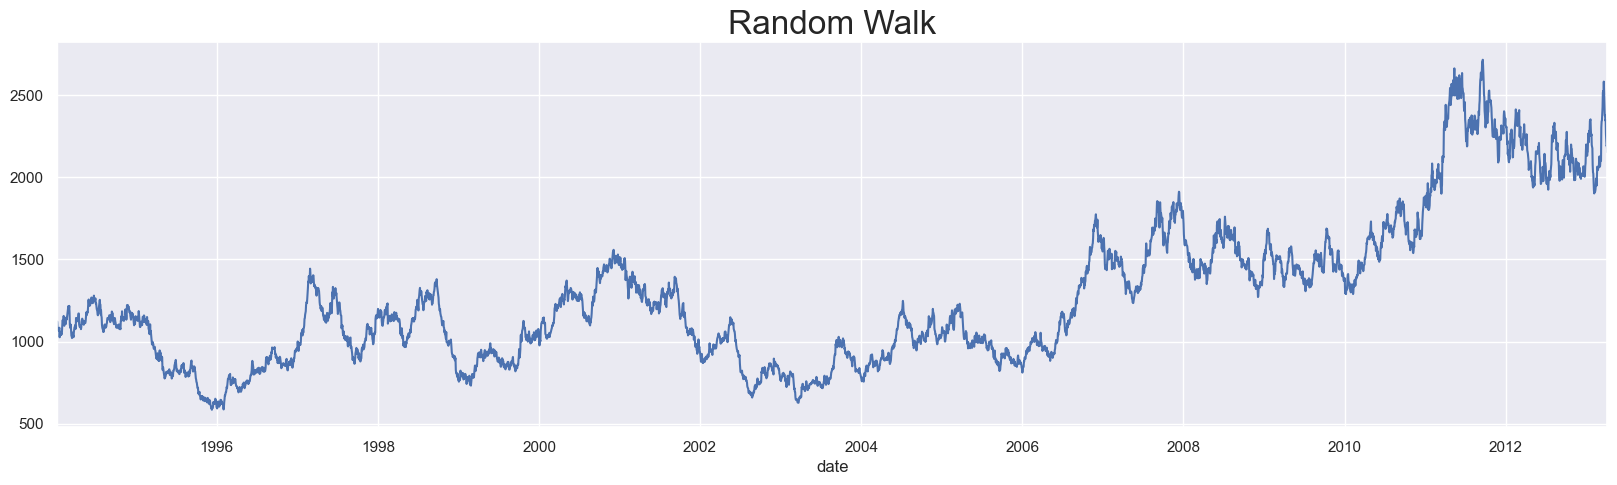

In [19]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

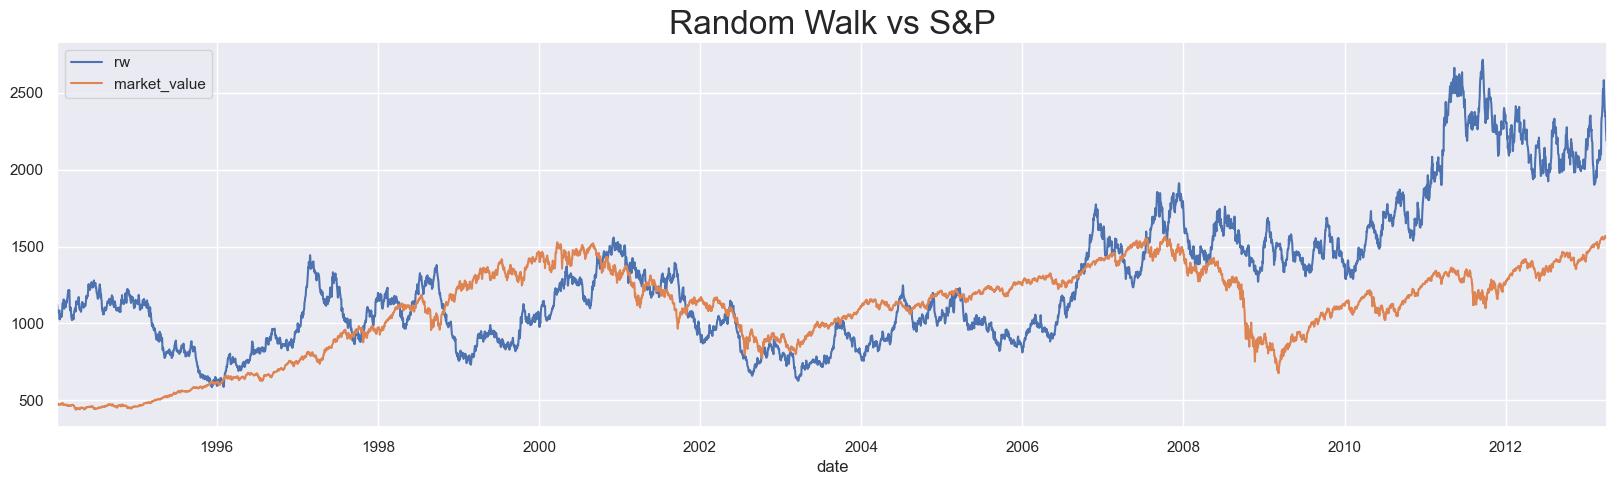

In [20]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Metodo Deke-Fuller  sts.adfuller(dataframe) Python
- Retorno
  - adf:The test statistic.

  - pvalue: MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).

  - usedlag: The number of lags used

  - nobs: The number of observations used for the ADF regression and calculation of the critical values

  - icbest: The maximized information criterion if autolag is not None.

  - resstore: Result Store, optional A dummy class with results attached as attributes

In [21]:
sts.adfuller(df.market_value)

(-1.7369847452352447,
 0.4121645696770616,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

El valor_test_std > valor_critico para los niveles de significación de 1%, 5% y 10%, por lo que se acepta la hiposis nula para cualquier de estos niveles de significación.

In [23]:
sts.adfuller(df.wn)

(-71.0440296426388,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70849.42628066482)

El valor_test_std < valor_critico para los niveles de significación de 1%, 5% y 10%, por lo que se rechaza la hiposis nula para cualquier de estos niveles de significación, así la seríe es estacionaría. Ademas el $p-value$ es menor para todos los niveles de significancia.

In [27]:
sts.adfuller(df.rw)


(-1.3286073927689697,
 0.6159849181617395,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

El valor_test_std > valor_critico para los niveles de significación de 1%, 5% y 10%, por otra parte vemos que el p-valor es mayor que los niveles de significancia del $1%$ y $5%$, por lo que no podemos conluir si es o no es estacionaria la seríe de caminata aleatoría.

### Seasonality

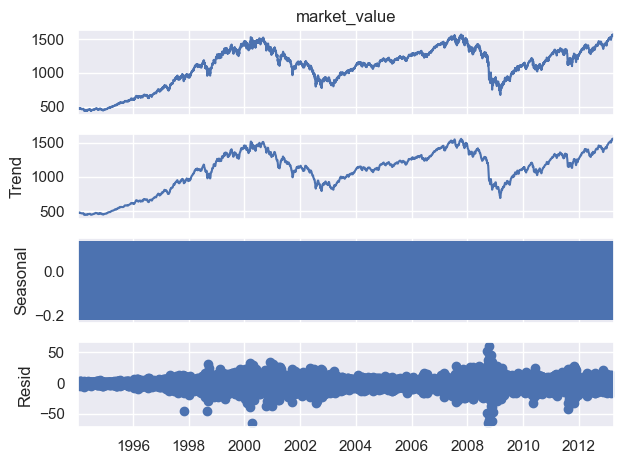

In [26]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

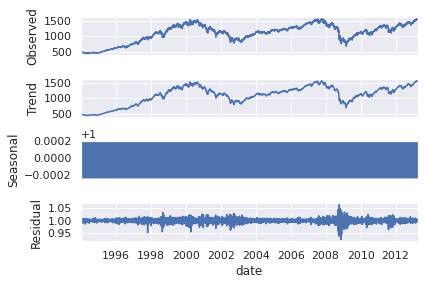

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

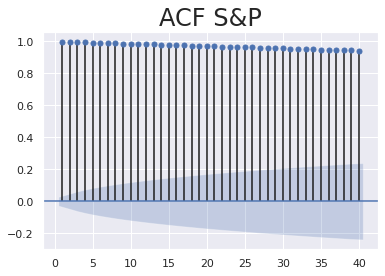

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

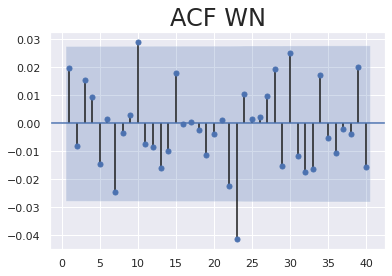

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

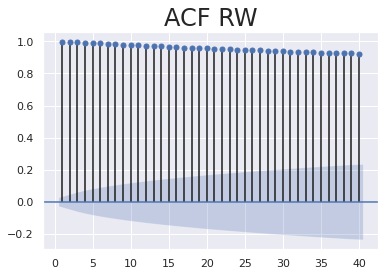

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

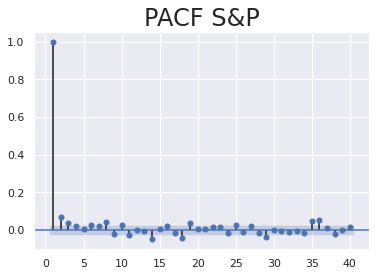

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

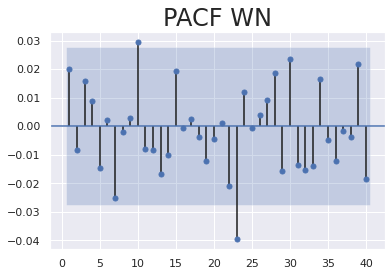

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

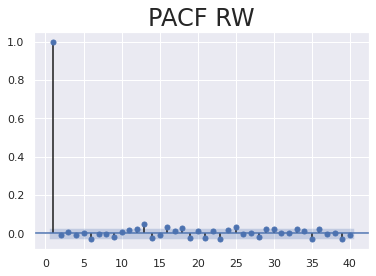

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()